# Llibreries

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
from tabulate import tabulate
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Càrrega de dades

In [2]:
# Carrega de dades
acc_drives_data = pd.read_csv('2023-05-16T16_00_18.617040Z_ACC_10_drives.csv', parse_dates=True)
gyro_drives_data = pd.read_csv('2023-05-16T16_00_18.617040Z_GYR_10_drives.csv', parse_dates=True)
acc_reves_data = pd.read_csv('2023-05-16T16_01_01.938104Z_ACC_10_reves.csv', parse_dates=True)
gyro_reves_data = pd.read_csv('2023-05-16T16_01_01.938104Z_GYR_10_reves.csv', parse_dates=True)

print(acc_drives_data.shape)
print(gyro_drives_data.shape)
print(acc_reves_data.shape)
print(gyro_reves_data.shape)

(1024, 5)
(1024, 5)
(974, 5)
(974, 5)


# Exemple de dades

In [3]:
display(acc_drives_data.head())
display(acc_reves_data.head())

,ACC_X,ACC_Y,ACC_Z,DATE,UNIX_TIMESTAMP
0,0.359604,0.387967,0.096799,2023-05-16T16:00:18.726076Z,1684252818725
1,-0.036314,0.221141,-0.032280,2023-05-16T16:00:18.744520Z,1684252818744
2,-0.295905,-0.050351,-0.029818,2023-05-16T16:00:18.768983Z,1684252818768
3,0.067937,-0.099615,0.200624,2023-05-16T16:00:18.788279Z,1684252818788
4,0.464885,-0.087375,0.584858,2023-05-16T16:00:18.804636Z,1684252818804


,ACC_X,ACC_Y,ACC_Z,DATE,UNIX_TIMESTAMP
0,0.280890,0.123275,-0.121500,2023-05-16T16:01:02.043834Z,1684252862043
1,-0.044452,0.447022,-0.224843,2023-05-16T16:01:02.063568Z,1684252862063
2,-0.154349,0.359463,-0.339447,2023-05-16T16:01:02.082402Z,1684252862082
3,0.094367,0.045618,-0.394982,2023-05-16T16:01:02.103530Z,1684252862103
4,0.617792,-0.169105,-0.152778,2023-05-16T16:01:02.122761Z,1684252862122


# Càlcul de la potència

In [4]:
# Calcul de la potencia de l'accelerometre
acc_drives_data['POWER'] = np.sqrt(acc_drives_data['ACC_X']**2 + acc_drives_data['ACC_Y']**2 + acc_drives_data['ACC_Z']**2)
display(acc_drives_data.head())

acc_reves_data['POWER'] = np.sqrt(acc_reves_data['ACC_X']**2 + acc_reves_data['ACC_Y']**2 + acc_reves_data['ACC_Z']**2)
display(acc_reves_data.head())

# Calcul de la potencia del gyroscopi      
gyro_drives_data['POWER'] = np.sqrt(gyro_drives_data['GYR_X']**2 + gyro_drives_data['GYR_Y']**2 + gyro_drives_data['GYR_Z']**2)
display(gyro_drives_data.head())

gyro_reves_data['POWER'] = np.sqrt(gyro_reves_data['GYR_X']**2 + gyro_reves_data['GYR_Y']**2 + gyro_reves_data['GYR_Z']**2)
display(gyro_reves_data.head())

,ACC_X,ACC_Y,ACC_Z,DATE,UNIX_TIMESTAMP,POWER
0,0.359604,0.387967,0.096799,2023-05-16T16:00:18.726076Z,1684252818725,0.537777
1,-0.036314,0.221141,-0.032280,2023-05-16T16:00:18.744520Z,1684252818744,0.226416
2,-0.295905,-0.050351,-0.029818,2023-05-16T16:00:18.768983Z,1684252818768,0.301635
3,0.067937,-0.099615,0.200624,2023-05-16T16:00:18.788279Z,1684252818788,0.234069
4,0.464885,-0.087375,0.584858,2023-05-16T16:00:18.804636Z,1684252818804,0.752205


,ACC_X,ACC_Y,ACC_Z,DATE,UNIX_TIMESTAMP,POWER
0,0.280890,0.123275,-0.121500,2023-05-16T16:01:02.043834Z,1684252862043,0.329936
1,-0.044452,0.447022,-0.224843,2023-05-16T16:01:02.063568Z,1684252862063,0.502354
2,-0.154349,0.359463,-0.339447,2023-05-16T16:01:02.082402Z,1684252862082,0.517940
3,0.094367,0.045618,-0.394982,2023-05-16T16:01:02.103530Z,1684252862103,0.408653
4,0.617792,-0.169105,-0.152778,2023-05-16T16:01:02.122761Z,1684252862122,0.658486


,GYR_X,GYR_Y,GYR_Z,DATE,UNIX_TIMESTAMP,POWER
0,-0.054595,-0.185356,0.123704,2023-05-16T16:00:18.723528Z,1684252818723,0.229434
1,-0.119576,-0.066046,0.222773,2023-05-16T16:00:18.742769Z,1684252818742,0.261321
2,-0.154730,-0.147006,0.309060,2023-05-16T16:00:18.766720Z,1684252818766,0.375593
3,-0.157925,-0.324905,0.303733,2023-05-16T16:00:18.786197Z,1684252818786,0.471972
4,-0.165382,-0.378169,0.294146,2023-05-16T16:00:18.802596Z,1684252818802,0.506838


,GYR_X,GYR_Y,GYR_Z,DATE,UNIX_TIMESTAMP,POWER
0,0.151001,0.251003,-0.076832,2023-05-16T16:01:02.042208Z,1684252862042,0.302831
1,0.125435,0.199870,-0.083224,2023-05-16T16:01:02.061756Z,1684252862061,0.250216
2,0.106260,0.040081,-0.106660,2023-05-16T16:01:02.081468Z,1684252862081,0.155801
3,0.091346,-0.081360,-0.098137,2023-05-16T16:01:02.102374Z,1684252862102,0.156826
4,0.093477,-0.089882,-0.099203,2023-05-16T16:01:02.121666Z,1684252862121,0.163272


# Càlcul dels pics

In [5]:
# Calcul dels pics. Els valors dels parametres s'han d'ajustar manualment per obtenir un pic per cada colpeig
acc_drives_peaks, _ = find_peaks(acc_drives_data['POWER'], height=30, distance=40)
acc_reves_peaks, _  = find_peaks(acc_reves_data['POWER'], height=15, distance=40)

# Mostrem el nombre de pics trobats
print("drive peaks: ", len(acc_drives_peaks))
print("reves peaks: ", len(acc_reves_peaks))

# Repetim l'operacio amb el giroscopi
gyro_drives_peaks, _ = find_peaks(gyro_drives_data['POWER'], height=15, distance=40)  
gyro_reves_peaks, _ = find_peaks(gyro_reves_data['POWER'], height=8, distance=20)

# Mostrem els pics del giroscopi
print("drive peaks: ", len(gyro_drives_peaks))
print("reves peaks: ", len(gyro_reves_peaks))

drive peaks:  10
reves peaks:  10
drive peaks:  10
reves peaks:  10


# Mostrem un gràfic amb els pics

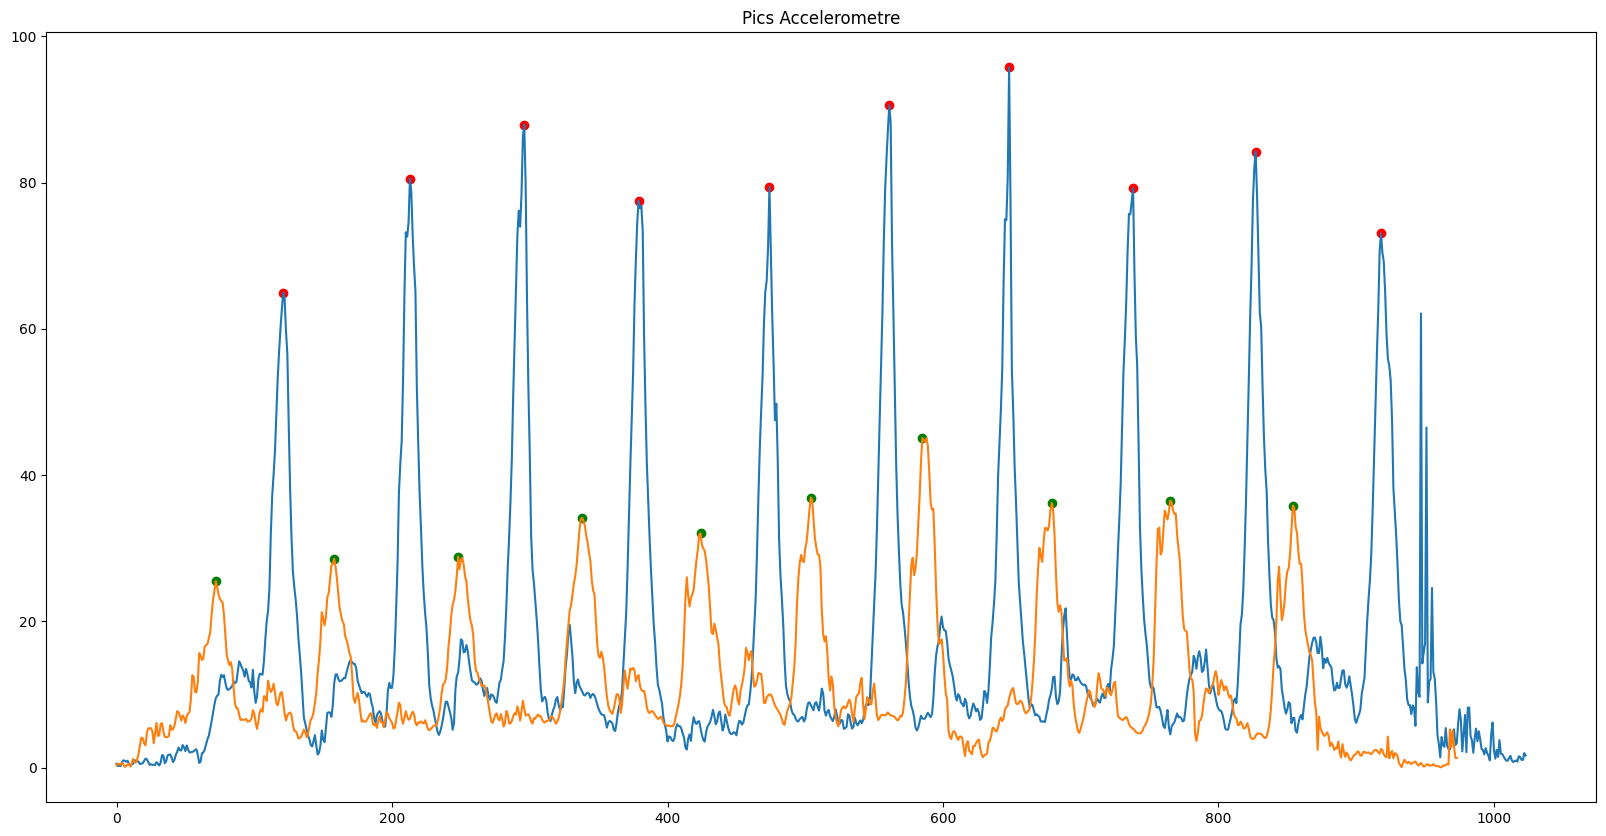

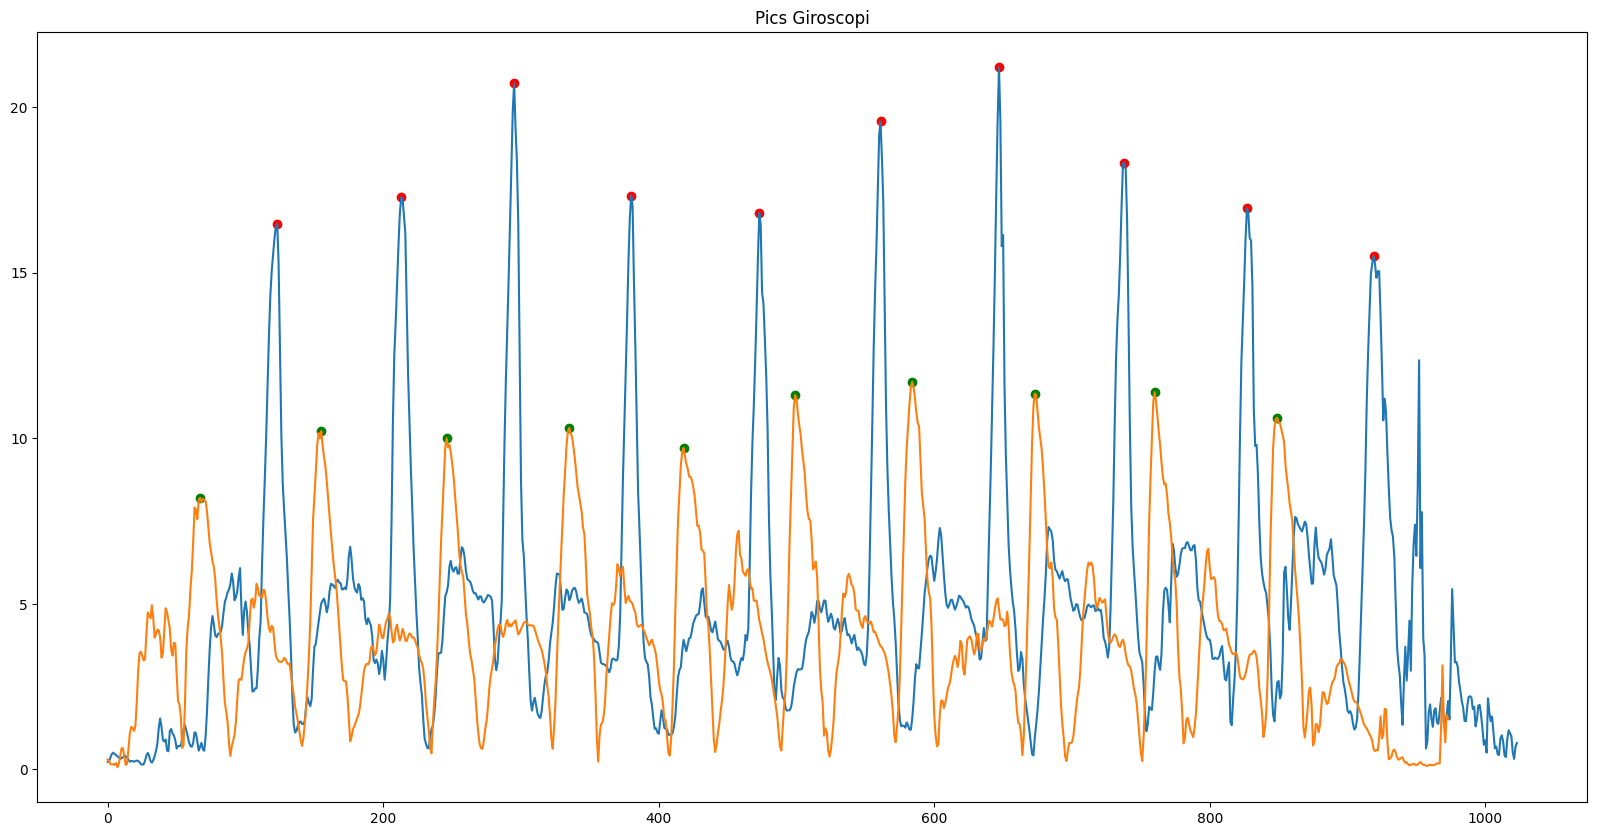

In [6]:
# Mostrem els pics pels drives
plt.figure(figsize=(20, 10))
plt.title("Pics Accelerometre")
acc_drives_data.POWER.plot()
plt.scatter(acc_drives_peaks, acc_drives_data.POWER[acc_drives_peaks], color='red')
acc_reves_data.POWER.plot()
plt.scatter(acc_reves_peaks, acc_reves_data.POWER[acc_reves_peaks], color='green')
plt.show()

# Mostrem els pics pels revesos
plt.figure(figsize=(20, 10))
plt.title("Pics Giroscopi")
gyro_drives_data.POWER.plot()
plt.scatter(gyro_drives_peaks, gyro_drives_data.POWER[gyro_drives_peaks], color='red')
gyro_reves_data.POWER.plot()
plt.scatter(gyro_reves_peaks, gyro_reves_data.POWER[gyro_reves_peaks], color='green')
plt.show()

# Funció per generar les dades per construir el model

In [7]:
def generate_strokes_data(acc_drives_peaks,
                          acc_reves_peaks,
                          gyro_drives_peaks,
                          gyro_reves_peaks,
                          acc_drives_data,
                          acc_reves_data, 
                          gyro_drives_data,
                          gyro_reves_data,
                          use_gyro_data=True,
                          samples_per_stroke=50,
                          window_size=5,
                          test_size=0.2):

    # Seleccionem les mostres per cada drive (50 per defecte)
    acc_windows = []
    for peak in acc_drives_peaks:
        start_idx = peak - samples_per_stroke // 2
        end_idx = start_idx + samples_per_stroke
        window = acc_drives_data.iloc[start_idx:end_idx]
        window = window.reset_index().drop("index", axis=1)
        
        # Seleccionem les mostres per cada finestra (5 per defecte)       
        groups = [group[1] for group in window.groupby(window.index // window_size)]
        for g in groups:
            acc_windows.append(g)
        
    # Extreiem les caracteristiques utilitzant les finestres anteriors
    acc_features = []
    for window in acc_windows:
        acc_features.append([window['ACC_X'].mean(), window['ACC_X'].median(), window['ACC_X'].std(),window['ACC_X'].min(),window['ACC_X'].max(),
                             window['ACC_Y'].mean(), window['ACC_Y'].median(), window['ACC_Y'].std(),window['ACC_Y'].min(),window['ACC_Y'].max(),
                             window['ACC_Z'].mean(), window['ACC_Z'].median(), window['ACC_Z'].std(),window['ACC_Z'].min(),window['ACC_Z'].max(),])
        
    # Convertim en numpy array
    X_drives_acc = np.array(acc_features)
    # Assignem la classe drives
    y_drives_acc = ["drives" for i in range(X_drives_acc.shape[0])]
    
    # Seleccionem les mostres per cada reves (50 per defecte
    acc_windows = []
    #for n, peak in enumerate(acc_reves_peaks):
    for peak in acc_reves_peaks:

        start_idx = peak - samples_per_stroke // 2
        end_idx = start_idx + samples_per_stroke
        window = acc_reves_data.iloc[start_idx:end_idx]
        window = window.reset_index().drop("index", axis=1)
        
        # Seleccionem les mostres per cada finestra (5 per defecte)
        groups = [group[1] for group in window.groupby(window.index // window_size)]
        for g in groups:
            acc_windows.append(g)
        
    # Extracció de caracteristiques
    acc_features = []
    for window in acc_windows:
        acc_features.append([window['ACC_X'].mean(), window['ACC_X'].median(), window['ACC_X'].std(),window['ACC_X'].min(),window['ACC_X'].max(),
                             window['ACC_Y'].mean(), window['ACC_Y'].median(), window['ACC_Y'].std(),window['ACC_Y'].min(),window['ACC_Y'].max(),
                             window['ACC_Z'].mean(), window['ACC_Z'].median(), window['ACC_Z'].std(),window['ACC_Z'].min(),window['ACC_Z'].max(),])
        
    # Convertim a numpy array
    X_reves_acc = np.array(acc_features)
    # Assignem la classe
    y_reves_acc = ["reves" for i in range(X_reves_acc.shape[0])]
    
    # Ajuntem les dades dels drives i dels revesos
    X_acc = np.concatenate([X_drives_acc, X_reves_acc])
    
    # Comprovem si cal utilitzar les dades del giroscopi (Per defecte True)
    if use_gyro_data:

        # Seleccionem les mostres per cada colpeig
        gyro_windows = []
        for peak in gyro_drives_peaks:
            start_idx = peak - samples_per_stroke // 2
            end_idx = start_idx + samples_per_stroke
            window = gyro_drives_data.iloc[start_idx:end_idx]
            window = window.reset_index().drop("index", axis=1)
            
            # Seleccionem les mostres per finestra (Per defecte 5)
            groups = [group[1] for group in window.groupby(window.index // window_size)]
            for g in groups:
                gyro_windows.append(g)

        # Extreiem les caracteristiques
        gyro_features = []
        for window in gyro_windows:
            gyro_features.append([window['GYR_X'].mean(), window['GYR_X'].median(), window['GYR_X'].std(),window['GYR_X'].min(),window['GYR_X'].max(),
                                  window['GYR_Y'].mean(), window['GYR_Y'].median(), window['GYR_Y'].std(),window['GYR_Y'].min(),window['GYR_Y'].max(),
                                  window['GYR_Z'].mean(), window['GYR_Z'].median(), window['GYR_Z'].std(),window['GYR_Z'].min(),window['GYR_Z'].max()])

        # Convertim a numpy array 
        X_drives_gyro = np.array(gyro_features)    
        

        # Repetim tot el procés pels revesos 
        gyro_windows = []
        for peak in gyro_reves_peaks:
            start_idx = peak - samples_per_stroke // 2
            end_idx = start_idx + samples_per_stroke
            window = gyro_reves_data.iloc[start_idx:end_idx]
            window = window.reset_index().drop("index", axis=1)
            
            # Selecció de mostres per finestra           
            groups = [group[1] for group in window.groupby(window.index // window_size)]
            for g in groups:
                gyro_windows.append(g)

        # Extracció de característiques 
        gyro_features = []
        for window in gyro_windows:
            gyro_features.append([window['GYR_X'].mean(), window['GYR_X'].median(), window['GYR_X'].std(),window['GYR_X'].min(),window['GYR_X'].max(),
                                  window['GYR_Y'].mean(), window['GYR_Y'].median(), window['GYR_Y'].std(),window['GYR_Y'].min(),window['GYR_Y'].max(),
                                  window['GYR_Z'].mean(), window['GYR_Z'].median(), window['GYR_Z'].std(),window['GYR_Z'].min(),window['GYR_Z'].max()])

        # Convertim a np array   
        X_reves_gyro = np.array(gyro_features)

        # Concatenem les dades dels dos cops
        X_gyro = np.concatenate([X_drives_gyro, X_reves_gyro])
        
        # Concatenem les dades de l'acc i del giro 
        X = np.concatenate([X_acc, X_gyro], axis=1)
        
    else:
        
        # Si no s'utilitzem les dades del giroscopi, només necessitem les de l'acc    
        X = X_acc.copy()
        
    # Unim les dades dels dos cops 
    y = np.concatenate([y_drives_acc, y_reves_acc])
    
    print("Total data: ", X.shape)
    
    # Separem les dades pels conjunts de test i d'entrenament en funcio de test_size (per defecte 20%)   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=2)
    
    # Substituim valors incorrectes si n'hi ha
    #X_train = pd.DataFrame(X_train).replace(np.nan, 0)
    #X_test = pd.DataFrame(X_test).replace(np.nan, 0)     
    
    return X_train, X_test, y_train, y_test

# Creació del model utilitzant les dades de l'acc i del giroscopi
* KNN
* Decision tree
* SVC
* Random Forest 
* Logistics Regression

In [8]:
# Funcio per avaluar el model
def modelEvaluation(predictions, y_test_set, model_name):
    
    # Mostrem el nom
    print("==========",model_name,"==========")
    # Precisio
    print ("\nEficàcia (accuracy): {:.4f}".format(accuracy_score(y_test_set, predictions)))    
    print ("\nInforme de classificació: \n", classification_report(y_test_set, predictions))
    print ("\nMatriu de confusió: \n", confusion_matrix(y_test_set, predictions))
    plt.figure(figsize=(5,5))
    sns.heatmap(confusion_matrix(y_test_set, predictions),annot=True)
    plt.tight_layout()
    plt.show()
    results = [accuracy_score(y_test_set, predictions), precision_score(y_test_set, predictions, average='macro'),
              recall_score(y_test_set, predictions, average='macro'),f1_score(y_test_set, predictions, average='macro')]
    return results

## Utilitzant 50 mostres per cop i 5 mostres per finestra

In [9]:
X_train, X_test, y_train, y_test = generate_strokes_data(acc_drives_peaks, # Pics drives acc
                                                         acc_reves_peaks,  # Pics revesos acc
                                                         gyro_drives_peaks, # Pics drives gyro
                                                         gyro_reves_peaks,  # Pics revesos gyro
                                                         acc_drives_data, # Acc drives data
                                                         acc_reves_data, # Acc revesos data
                                                         gyro_drives_data, # Gyro drives data
                                                         gyro_reves_data, # Gyro revesos data
                                                         window_size=5, # Mida finestra
                                                         test_size=0.2, # Mida test
                                                         samples_per_stroke=50 # Mostres per cop
                                                        ) 

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

Total data:  (200, 30)
X_train: (160, 30)
X_test: (40, 30)


========== Decision tree ==========

Eficàcia (accuracy): 0.9000

Informe de classificació: 
               precision    recall  f1-score   support

      drives       0.92      0.92      0.92        24
       reves       0.88      0.88      0.88        16

    accuracy                           0.90        40
   macro avg       0.90      0.90      0.90        40
weighted avg       0.90      0.90      0.90        40


Matriu de confusió: 
 [[22  2]
 [ 2 14]]


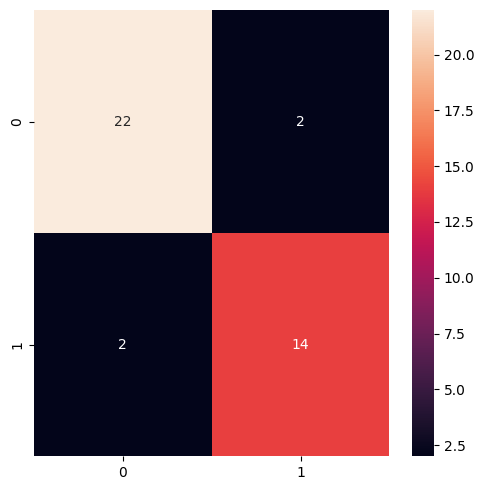

========== Random Forest ==========

Eficàcia (accuracy): 0.9750

Informe de classificació: 
               precision    recall  f1-score   support

      drives       1.00      0.96      0.98        24
       reves       0.94      1.00      0.97        16

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40


Matriu de confusió: 
 [[23  1]
 [ 0 16]]


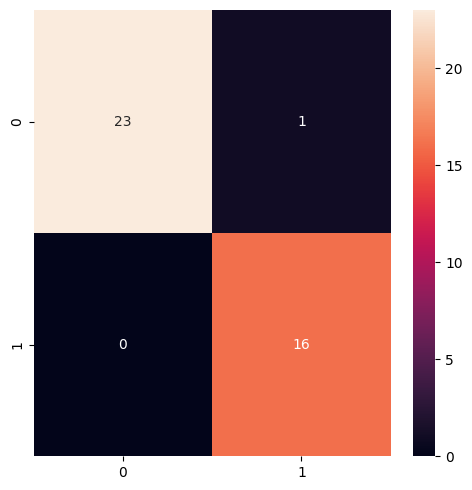

========== Logistic Regression ==========

Eficàcia (accuracy): 0.9250

Informe de classificació: 
               precision    recall  f1-score   support

      drives       0.96      0.92      0.94        24
       reves       0.88      0.94      0.91        16

    accuracy                           0.93        40
   macro avg       0.92      0.93      0.92        40
weighted avg       0.93      0.93      0.93        40


Matriu de confusió: 
 [[22  2]
 [ 1 15]]


/usr/local/lib64/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


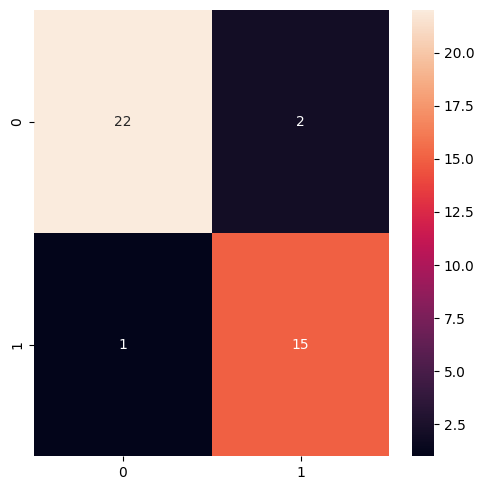

========== SVC ==========

Eficàcia (accuracy): 0.9250

Informe de classificació: 
               precision    recall  f1-score   support

      drives       1.00      0.88      0.93        24
       reves       0.84      1.00      0.91        16

    accuracy                           0.93        40
   macro avg       0.92      0.94      0.92        40
weighted avg       0.94      0.93      0.93        40


Matriu de confusió: 
 [[21  3]
 [ 0 16]]


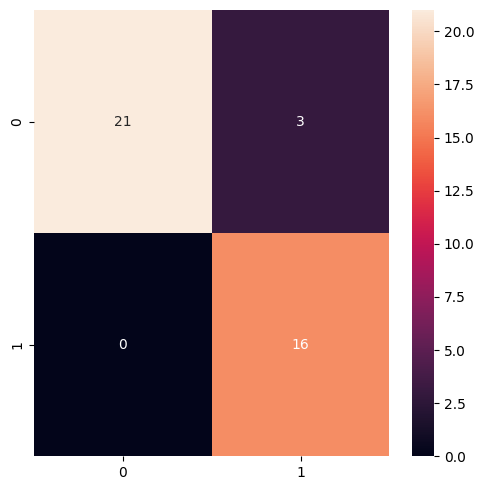

========== KNN Classifier ==========

Eficàcia (accuracy): 0.9750

Informe de classificació: 
               precision    recall  f1-score   support

      drives       1.00      0.96      0.98        24
       reves       0.94      1.00      0.97        16

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40


Matriu de confusió: 
 [[23  1]
 [ 0 16]]


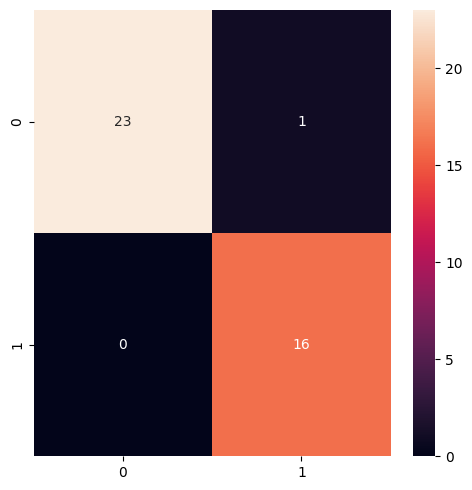

+-----------+-----------------+-----------------+-----------------------+----------+------------------+
| Metrics   |   Decision tree |   Random Forest |   Logistic Regression |      SVC |   KNN Classifier |
|-----------+-----------------+-----------------+-----------------------+----------+------------------|
| accuracy  |        0.9      |        0.975    |              0.925    | 0.925    |         0.975    |
| precision |        0.895833 |        0.970588 |              0.919437 | 0.921053 |         0.970588 |
| recall    |        0.895833 |        0.979167 |              0.927083 | 0.9375   |         0.979167 |
| f1-score  |        0.895833 |        0.97421  |              0.922631 | 0.92381  |         0.97421  |
+-----------+-----------------+-----------------+-----------------------+----------+------------------+


In [10]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
pred_dt = dt_model.predict(X_test)
result_50_dt = modelEvaluation(pred_dt, y_test, 'Decision tree')

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
pred_rf = rf_model.predict(X_test)
result_50_rf = modelEvaluation(pred_rf, y_test, 'Random Forest')

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
pred_lr = lr_model.predict(X_test)
results_50_lr = modelEvaluation(pred_lr, y_test, 'Logistic Regression')

# SVM
svc_model = SVC()
svc_model.fit(X_train, y_train)
pred_svc = svc_model.predict(X_test)
results_50_svc = modelEvaluation(pred_svc, y_test, 'SVC')

# KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
pred_knn = knn_model.predict(X_test)
results_50_knn = modelEvaluation(pred_knn, y_test, 'KNN Classifier')

# Comparant els resultats obtinguts
dic = {
    'Metrics':['accuracy','precision','recall','f1-score'],
    'Decision tree' : result_50_dt,
    'Random Forest' : result_50_rf,
    'Logistic Regression' : results_50_lr,
    'SVC': results_50_svc,
    'KNN Classifier':results_50_knn
    
}
metrics_df = pd.DataFrame(dic)

metrics_df = metrics_df.set_index('Metrics')
# Mostrant comparativa de resultats
print(tabulate(metrics_df, headers = 'keys', tablefmt = 'psql'))

## 50 mostres per cop i 10 per finestra

In [11]:
X_train, X_test, y_train, y_test = generate_strokes_data(acc_drives_peaks, # Pics drives acc
                                                         acc_reves_peaks,  # Pics revesos acc
                                                         gyro_drives_peaks, # Pics drives gyro
                                                         gyro_reves_peaks,  # Pics revesos gyro
                                                         acc_drives_data, # Acc drives data
                                                         acc_reves_data, # Acc revesos data
                                                         gyro_drives_data, # Gyro drives data
                                                         gyro_reves_data, # Gyro revesos data
                                                         window_size=10, # Mida finestra
                                                         test_size=0.2, # Mida test
                                                         samples_per_stroke=50 # Mostres per cop
                                                        ) 

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

Total data:  (100, 30)
X_train: (80, 30)
X_test: (20, 30)


========== Decision tree ==========

Eficàcia (accuracy): 0.9500

Informe de classificació: 
               precision    recall  f1-score   support

      drives       1.00      0.92      0.96        13
       reves       0.88      1.00      0.93         7

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20


Matriu de confusió: 
 [[12  1]
 [ 0  7]]


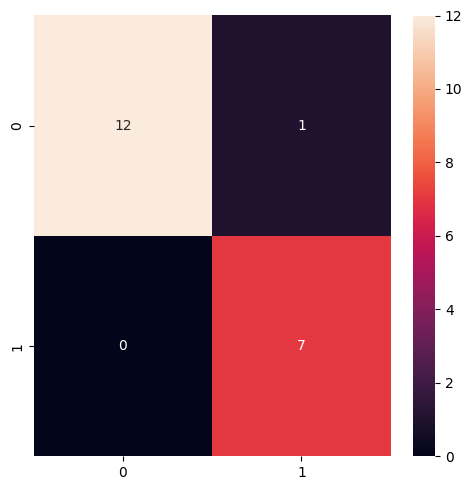

========== Random Forest ==========

Eficàcia (accuracy): 1.0000

Informe de classificació: 
               precision    recall  f1-score   support

      drives       1.00      1.00      1.00        13
       reves       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20


Matriu de confusió: 
 [[13  0]
 [ 0  7]]


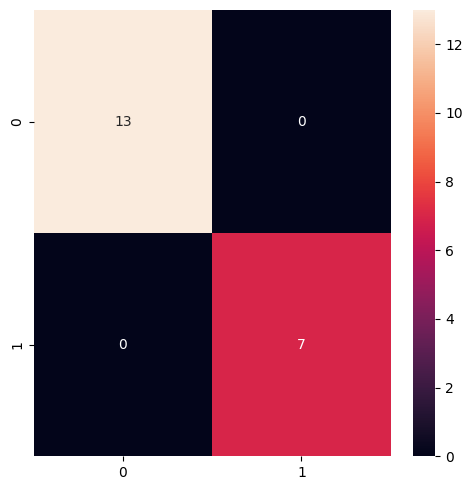

========== Logistic Regression ==========

Eficàcia (accuracy): 0.9500

Informe de classificació: 
               precision    recall  f1-score   support

      drives       1.00      0.92      0.96        13
       reves       0.88      1.00      0.93         7

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20


Matriu de confusió: 
 [[12  1]
 [ 0  7]]


/usr/local/lib64/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


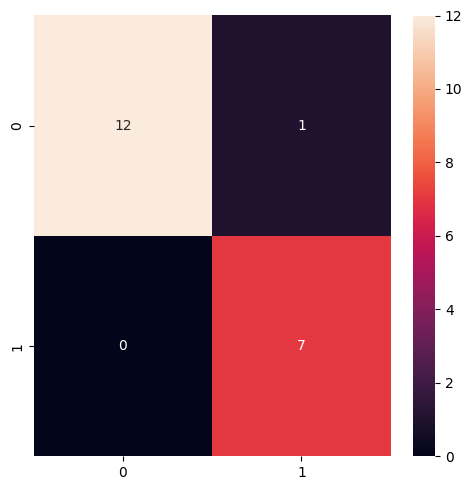

========== SVC ==========

Eficàcia (accuracy): 0.7000

Informe de classificació: 
               precision    recall  f1-score   support

      drives       1.00      0.54      0.70        13
       reves       0.54      1.00      0.70         7

    accuracy                           0.70        20
   macro avg       0.77      0.77      0.70        20
weighted avg       0.84      0.70      0.70        20


Matriu de confusió: 
 [[7 6]
 [0 7]]


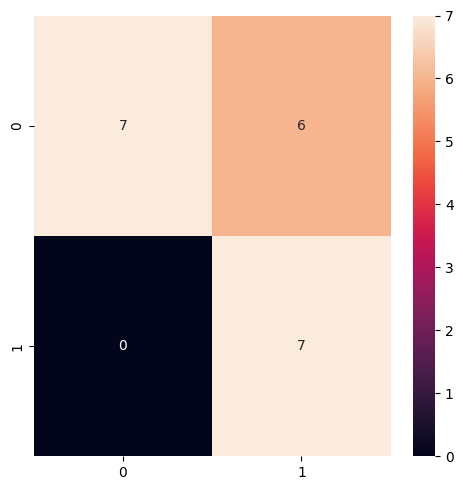

========== KNN Classifier ==========

Eficàcia (accuracy): 0.9500

Informe de classificació: 
               precision    recall  f1-score   support

      drives       0.93      1.00      0.96        13
       reves       1.00      0.86      0.92         7

    accuracy                           0.95        20
   macro avg       0.96      0.93      0.94        20
weighted avg       0.95      0.95      0.95        20


Matriu de confusió: 
 [[13  0]
 [ 1  6]]


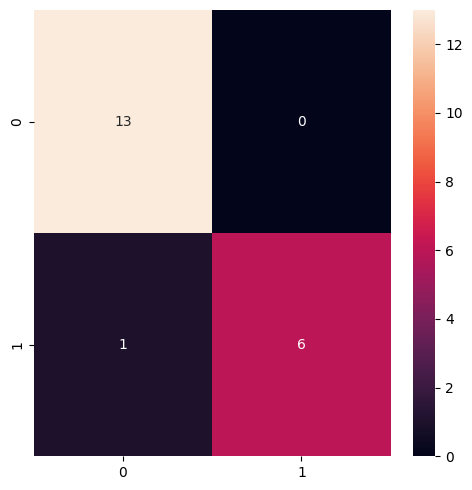

+-----------+-----------------+-----------------+-----------------------+----------+------------------+
| Metrics   |   Decision tree |   Random Forest |   Logistic Regression |      SVC |   KNN Classifier |
|-----------+-----------------+-----------------+-----------------------+----------+------------------|
| accuracy  |        0.95     |               1 |              0.95     | 0.7      |         0.95     |
| precision |        0.9375   |               1 |              0.9375   | 0.769231 |         0.964286 |
| recall    |        0.961538 |               1 |              0.961538 | 0.769231 |         0.928571 |
| f1-score  |        0.946667 |               1 |              0.946667 | 0.7      |         0.94302  |
+-----------+-----------------+-----------------+-----------------------+----------+------------------+


In [12]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
pred_dt = dt_model.predict(X_test)
result_50_dt = modelEvaluation(pred_dt, y_test, 'Decision tree')

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
pred_rf = rf_model.predict(X_test)
result_50_rf = modelEvaluation(pred_rf, y_test, 'Random Forest')

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
pred_lr = lr_model.predict(X_test)
results_50_lr = modelEvaluation(pred_lr, y_test, 'Logistic Regression')

# SVM
svc_model = SVC()
svc_model.fit(X_train, y_train)
pred_svc = svc_model.predict(X_test)
results_50_svc = modelEvaluation(pred_svc, y_test, 'SVC')

# KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
pred_knn = knn_model.predict(X_test)
results_50_knn = modelEvaluation(pred_knn, y_test, 'KNN Classifier')

# Comparant els resultats obtinguts
dic = {
    'Metrics':['accuracy','precision','recall','f1-score'],
    'Decision tree' : result_50_dt,
    'Random Forest' : result_50_rf,
    'Logistic Regression' : results_50_lr,
    'SVC': results_50_svc,
    'KNN Classifier':results_50_knn
    
}
metrics_df = pd.DataFrame(dic)

metrics_df = metrics_df.set_index('Metrics')
# Mostrant comparativa de resultats
print(tabulate(metrics_df, headers = 'keys', tablefmt = 'psql'))

## 90 mostres per cop i 5 per finestra

In [13]:
# Repetim utilitzant 90 mostres per cop
X_train, X_test, y_train, y_test = generate_strokes_data(acc_drives_peaks, # Pics drives acc
                                                         acc_reves_peaks,  # Pics revesos acc
                                                         gyro_drives_peaks, # Pics drives gyro
                                                         gyro_reves_peaks,  # Pics revesos gyro
                                                         acc_drives_data, # Acc drives data
                                                         acc_reves_data, # Acc revesos data
                                                         gyro_drives_data, # Gyro drives data
                                                         gyro_reves_data, # Gyro Revesos data
                                                         window_size=5, # Mostres per finestra
                                                         test_size=0.2, # Test Size 
                                                         samples_per_stroke=90 # Mostres per cop
                                                        ) 

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

Total data:  (360, 30)
X_train: (288, 30)
X_test: (72, 30)


========== Decision tree ==========

Eficàcia (accuracy): 0.8194

Informe de classificació: 
               precision    recall  f1-score   support

      drives       0.88      0.76      0.82        38
       reves       0.77      0.88      0.82        34

    accuracy                           0.82        72
   macro avg       0.82      0.82      0.82        72
weighted avg       0.83      0.82      0.82        72


Matriu de confusió: 
 [[29  9]
 [ 4 30]]


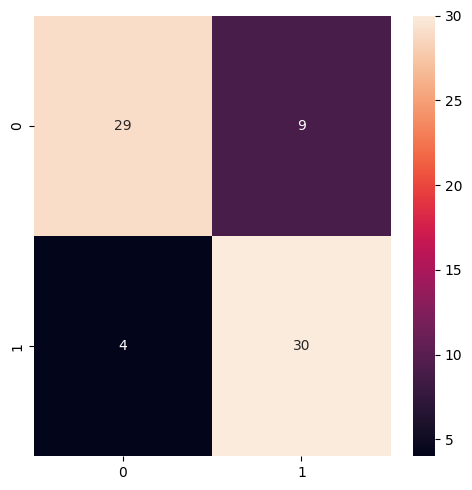

========== Random Forest ==========

Eficàcia (accuracy): 0.9028

Informe de classificació: 
               precision    recall  f1-score   support

      drives       0.97      0.84      0.90        38
       reves       0.85      0.97      0.90        34

    accuracy                           0.90        72
   macro avg       0.91      0.91      0.90        72
weighted avg       0.91      0.90      0.90        72


Matriu de confusió: 
 [[32  6]
 [ 1 33]]


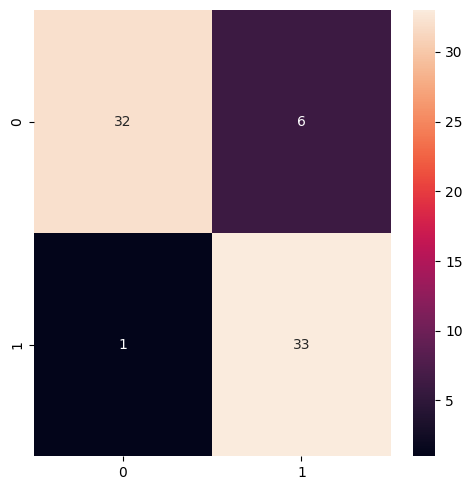

========== Logistic Regression ==========

Eficàcia (accuracy): 0.7639

Informe de classificació: 
               precision    recall  f1-score   support

      drives       0.84      0.68      0.75        38
       reves       0.71      0.85      0.77        34

    accuracy                           0.76        72
   macro avg       0.77      0.77      0.76        72
weighted avg       0.78      0.76      0.76        72


Matriu de confusió: 
 [[26 12]
 [ 5 29]]


/usr/local/lib64/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


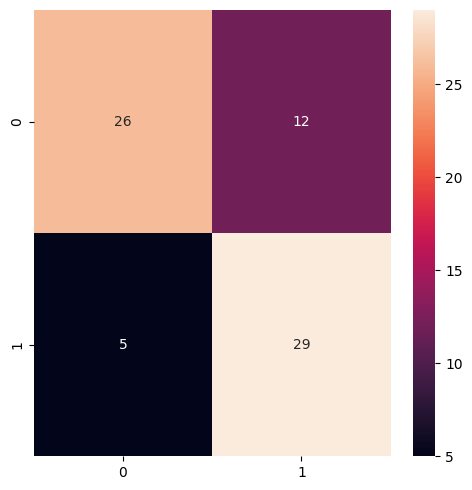

========== SVC ==========

Eficàcia (accuracy): 0.8056

Informe de classificació: 
               precision    recall  f1-score   support

      drives       0.90      0.71      0.79        38
       reves       0.74      0.91      0.82        34

    accuracy                           0.81        72
   macro avg       0.82      0.81      0.80        72
weighted avg       0.82      0.81      0.80        72


Matriu de confusió: 
 [[27 11]
 [ 3 31]]


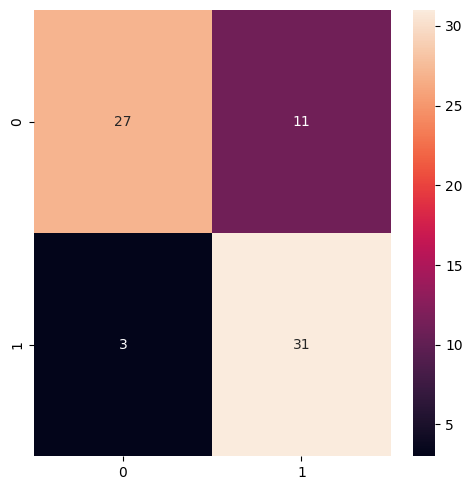

========== KNN Classifier ==========

Eficàcia (accuracy): 0.9167

Informe de classificació: 
               precision    recall  f1-score   support

      drives       0.94      0.89      0.92        38
       reves       0.89      0.94      0.91        34

    accuracy                           0.92        72
   macro avg       0.92      0.92      0.92        72
weighted avg       0.92      0.92      0.92        72


Matriu de confusió: 
 [[34  4]
 [ 2 32]]


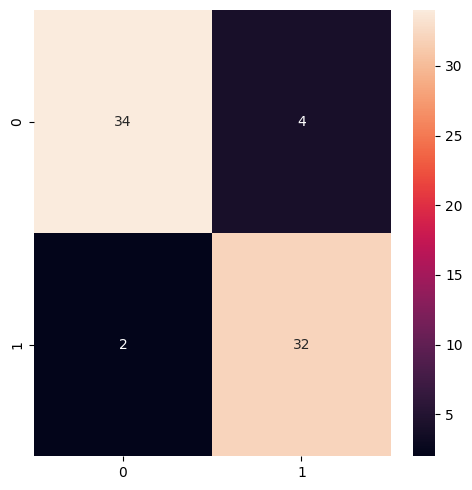

+-----------+-----------------+-----------------+-----------------------+----------+------------------+
| Metrics   |   Decision tree |   Random Forest |   Logistic Regression |      SVC |   KNN Classifier |
|-----------+-----------------+-----------------+-----------------------+----------+------------------|
| accuracy  |        0.819444 |        0.902778 |              0.763889 | 0.805556 |         0.916667 |
| precision |        0.824009 |        0.907925 |              0.773013 | 0.819048 |         0.916667 |
| recall    |        0.822755 |        0.906347 |              0.768576 | 0.811146 |         0.917957 |
| f1-score  |        0.81941  |        0.902759 |              0.763478 | 0.804954 |         0.916602 |
+-----------+-----------------+-----------------+-----------------------+----------+------------------+


In [14]:
# Decision tree 
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
pred_dt = dt_model.predict(X_test)
result_90_dt = modelEvaluation(pred_dt, y_test, 'Decision tree')

# Random Forest 
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
pred_rf = rf_model.predict(X_test)
result_90_rf = modelEvaluation(pred_rf, y_test, 'Random Forest')

# Logistic Regression 
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
pred_lr = lr_model.predict(X_test)
results_90_lr = modelEvaluation(pred_lr, y_test, 'Logistic Regression')

# SVM
svc_model = SVC()
svc_model.fit(X_train, y_train)
pred_svc = svc_model.predict(X_test)
results_90_svc = modelEvaluation(pred_svc, y_test, 'SVC')

# KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
pred_knn = knn_model.predict(X_test)
results_90_knn = modelEvaluation(pred_knn, y_test, 'KNN Classifier')

# Mostrant resultats
dic = {
    'Metrics':['accuracy','precision','recall','f1-score'],
    'Decision tree' : result_90_dt,
    'Random Forest' : result_90_rf,
    'Logistic Regression' : results_90_lr,
    'SVC': results_90_svc,
    'KNN Classifier':results_90_knn
    
}
metrics_df = pd.DataFrame(dic)

metrics_df = metrics_df.set_index('Metrics')
# Mostrant comparativa de resultats
print(tabulate(metrics_df, headers = 'keys', tablefmt = 'psql'))

## 90 mostres per cop i 10 per finestra

In [15]:
# Repetim utilitzant 90 mostres per cop
X_train, X_test, y_train, y_test = generate_strokes_data(acc_drives_peaks, # Pics drives acc
                                                         acc_reves_peaks,  # Pics revesos acc
                                                         gyro_drives_peaks, # Pics drives gyro
                                                         gyro_reves_peaks,  # Pics revesos gyro
                                                         acc_drives_data, # Acc drives data
                                                         acc_reves_data, # Acc revesos data
                                                         gyro_drives_data, # Gyro drives data
                                                         gyro_reves_data, # Gyro Revesos data
                                                         window_size=10, # Mostres per finestra
                                                         test_size=0.2, # Test Size 
                                                         samples_per_stroke=90 # Mostres per cop
                                                        ) 

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

Total data:  (180, 30)
X_train: (144, 30)
X_test: (36, 30)


========== Decision tree ==========

Eficàcia (accuracy): 0.9167

Informe de classificació: 
               precision    recall  f1-score   support

      drives       0.95      0.90      0.93        21
       reves       0.88      0.93      0.90        15

    accuracy                           0.92        36
   macro avg       0.91      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36


Matriu de confusió: 
 [[19  2]
 [ 1 14]]


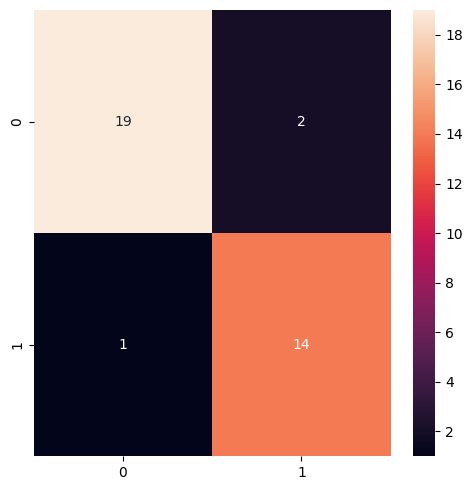

========== Random Forest ==========

Eficàcia (accuracy): 0.9167

Informe de classificació: 
               precision    recall  f1-score   support

      drives       0.95      0.90      0.93        21
       reves       0.88      0.93      0.90        15

    accuracy                           0.92        36
   macro avg       0.91      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36


Matriu de confusió: 
 [[19  2]
 [ 1 14]]


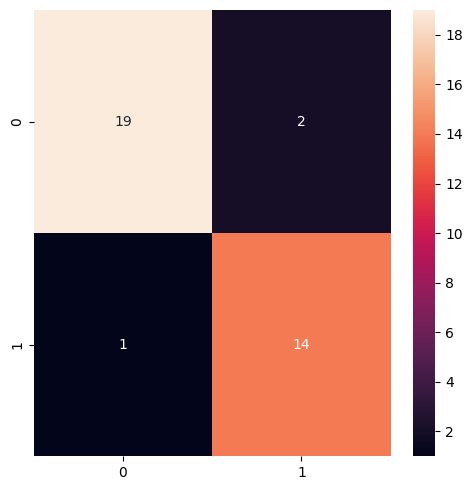

/usr/local/lib64/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


========== Logistic Regression ==========

Eficàcia (accuracy): 0.9167

Informe de classificació: 
               precision    recall  f1-score   support

      drives       0.95      0.90      0.93        21
       reves       0.88      0.93      0.90        15

    accuracy                           0.92        36
   macro avg       0.91      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36


Matriu de confusió: 
 [[19  2]
 [ 1 14]]


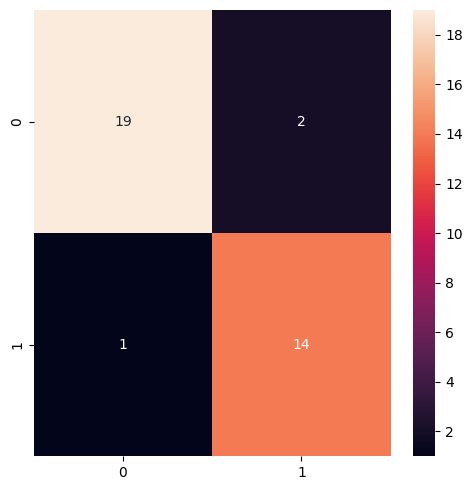

========== SVC ==========

Eficàcia (accuracy): 0.8333

Informe de classificació: 
               precision    recall  f1-score   support

      drives       0.89      0.81      0.85        21
       reves       0.76      0.87      0.81        15

    accuracy                           0.83        36
   macro avg       0.83      0.84      0.83        36
weighted avg       0.84      0.83      0.83        36


Matriu de confusió: 
 [[17  4]
 [ 2 13]]


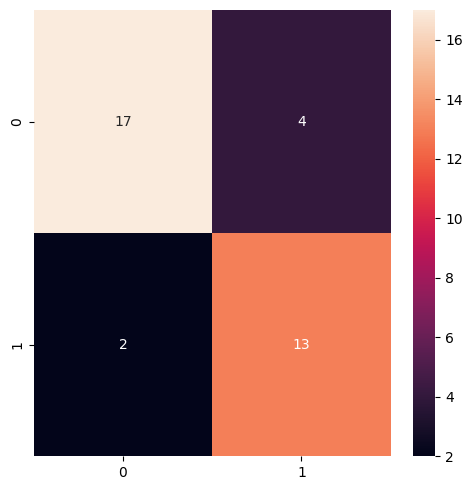

========== KNN Classifier ==========

Eficàcia (accuracy): 0.9722

Informe de classificació: 
               precision    recall  f1-score   support

      drives       0.95      1.00      0.98        21
       reves       1.00      0.93      0.97        15

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36


Matriu de confusió: 
 [[21  0]
 [ 1 14]]


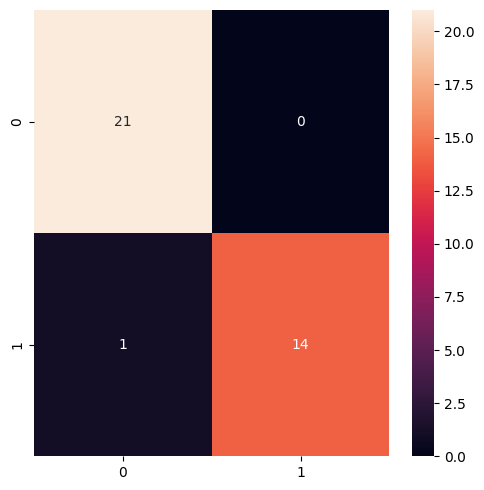

+-----------+-----------------+-----------------+-----------------------+----------+------------------+
| Metrics   |   Decision tree |   Random Forest |   Logistic Regression |      SVC |   KNN Classifier |
|-----------+-----------------+-----------------+-----------------------+----------+------------------|
| accuracy  |        0.916667 |        0.916667 |              0.916667 | 0.833333 |         0.972222 |
| precision |        0.9125   |        0.9125   |              0.9125   | 0.829721 |         0.977273 |
| recall    |        0.919048 |        0.919048 |              0.919048 | 0.838095 |         0.966667 |
| f1-score  |        0.915028 |        0.915028 |              0.915028 | 0.83125  |         0.971131 |
+-----------+-----------------+-----------------+-----------------------+----------+------------------+


In [16]:
# Decision tree 
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
pred_dt = dt_model.predict(X_test)
result_90_dt = modelEvaluation(pred_dt, y_test, 'Decision tree')

# Random Forest 
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
pred_rf = rf_model.predict(X_test)
result_90_rf = modelEvaluation(pred_rf, y_test, 'Random Forest')

# Logistic Regression 
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
pred_lr = lr_model.predict(X_test)
results_90_lr = modelEvaluation(pred_lr, y_test, 'Logistic Regression')

# SVM
svc_model = SVC()
svc_model.fit(X_train, y_train)
pred_svc = svc_model.predict(X_test)
results_90_svc = modelEvaluation(pred_svc, y_test, 'SVC')

# KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
pred_knn = knn_model.predict(X_test)
results_90_knn = modelEvaluation(pred_knn, y_test, 'KNN Classifier')

# Mostrant resultats
dic = {
    'Metrics':['accuracy','precision','recall','f1-score'],
    'Decision tree' : result_90_dt,
    'Random Forest' : result_90_rf,
    'Logistic Regression' : results_90_lr,
    'SVC': results_90_svc,
    'KNN Classifier':results_90_knn
    
}
metrics_df = pd.DataFrame(dic)

metrics_df = metrics_df.set_index('Metrics')
# Mostrant comparativa de resultats
print(tabulate(metrics_df, headers = 'keys', tablefmt = 'psql'))

# Creació del model sense utilitzar les dades del giroscopi
* KNN
* Decision tree
* SVC
* Ranodm Forest 
* Logistics Regression

## 50 mostres per cop i 5 per finestra (sense giroscopi)

In [17]:
X_train, X_test, y_train, y_test = generate_strokes_data(acc_drives_peaks, # Pics
                                                         acc_reves_peaks,  # Pics
                                                         gyro_drives_peaks, # Pics
                                                         gyro_reves_peaks,  # Pics
                                                         acc_drives_data, # Acc data
                                                         acc_reves_data, # Acc data
                                                         gyro_drives_data, # Gyro data
                                                         gyro_reves_data, # Gyro data
                                                         window_size=5, # Mida finestra
                                                         use_gyro_data=False, # Sense utilitzar el giroscopi
                                                         test_size=0.3, # Test Size
                                                         samples_per_stroke=50 # Mostres per cop
                                                        ) 

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

Total data:  (200, 15)
X_train: (140, 15)
X_test: (60, 15)


========== Decision tree ==========

Eficàcia (accuracy): 0.8000

Informe de classificació: 
               precision    recall  f1-score   support

      drives       0.74      0.94      0.83        31
       reves       0.90      0.66      0.76        29

    accuracy                           0.80        60
   macro avg       0.82      0.80      0.79        60
weighted avg       0.82      0.80      0.80        60


Matriu de confusió: 
 [[29  2]
 [10 19]]


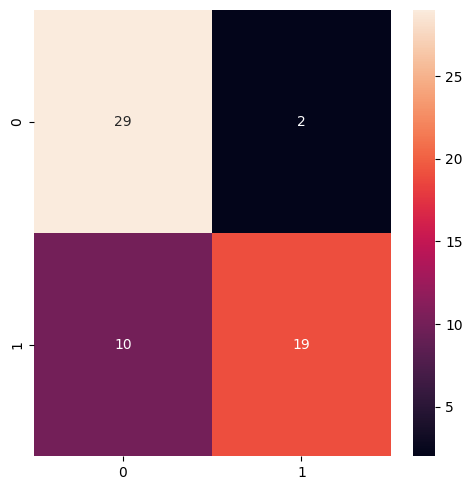

========== Random Forest ==========

Eficàcia (accuracy): 0.9167

Informe de classificació: 
               precision    recall  f1-score   support

      drives       0.88      0.97      0.92        31
       reves       0.96      0.86      0.91        29

    accuracy                           0.92        60
   macro avg       0.92      0.91      0.92        60
weighted avg       0.92      0.92      0.92        60


Matriu de confusió: 
 [[30  1]
 [ 4 25]]


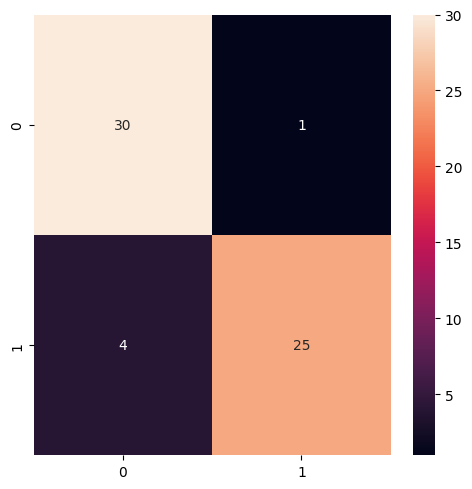

/usr/local/lib64/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


========== Logistic Regression ==========

Eficàcia (accuracy): 0.6333

Informe de classificació: 
               precision    recall  f1-score   support

      drives       0.71      0.48      0.58        31
       reves       0.59      0.79      0.68        29

    accuracy                           0.63        60
   macro avg       0.65      0.64      0.63        60
weighted avg       0.65      0.63      0.63        60


Matriu de confusió: 
 [[15 16]
 [ 6 23]]


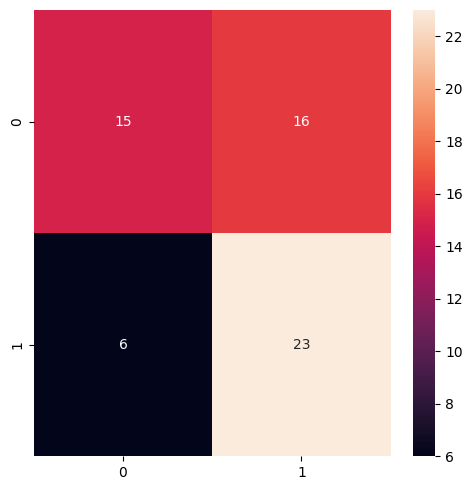

========== SVC ==========

Eficàcia (accuracy): 0.8500

Informe de classificació: 
               precision    recall  f1-score   support

      drives       0.89      0.81      0.85        31
       reves       0.81      0.90      0.85        29

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60


Matriu de confusió: 
 [[25  6]
 [ 3 26]]


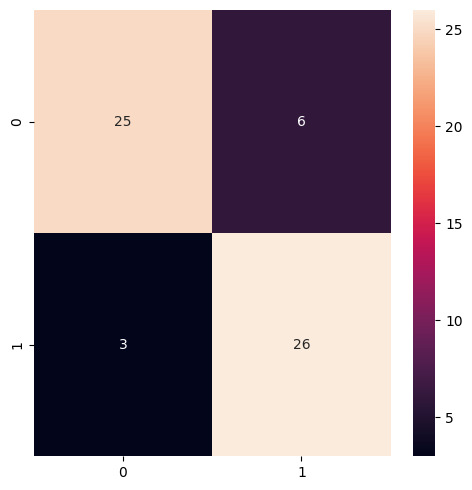

========== KNN Classifier ==========

Eficàcia (accuracy): 0.8667

Informe de classificació: 
               precision    recall  f1-score   support

      drives       0.87      0.87      0.87        31
       reves       0.86      0.86      0.86        29

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60


Matriu de confusió: 
 [[27  4]
 [ 4 25]]


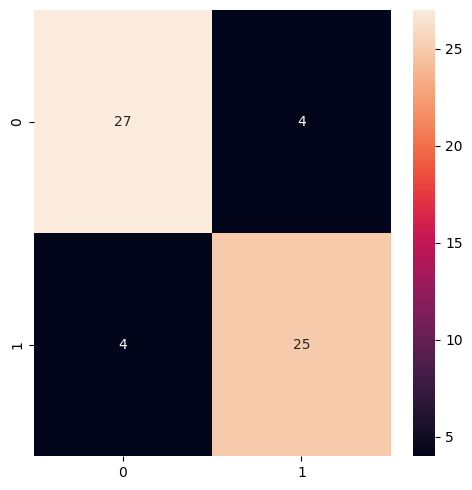

+-----------+-----------------+-----------------+-----------------------+----------+------------------+
| Metrics   |   Decision tree |   Random Forest |   Logistic Regression |      SVC |   KNN Classifier |
|-----------+-----------------+-----------------+-----------------------+----------+------------------|
| accuracy  |        0.8      |        0.916667 |              0.633333 | 0.85     |         0.866667 |
| precision |        0.824176 |        0.921946 |              0.652015 | 0.852679 |         0.866518 |
| recall    |        0.795328 |        0.914905 |              0.638487 | 0.851502 |         0.866518 |
| f1-score  |        0.794286 |        0.916084 |              0.626697 | 0.849958 |         0.866518 |
+-----------+-----------------+-----------------+-----------------------+----------+------------------+


In [18]:
# Decision tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
pred_dt = dt_model.predict(X_test)
result_50_dt = modelEvaluation(pred_dt, y_test, 'Decision tree')

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
pred_rf = rf_model.predict(X_test)
result_50_rf = modelEvaluation(pred_rf, y_test, 'Random Forest')

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
pred_lr = lr_model.predict(X_test)
results_50_lr = modelEvaluation(pred_lr, y_test, 'Logistic Regression')

# SVM
svc_model = SVC()
svc_model.fit(X_train, y_train)
pred_svc = svc_model.predict(X_test)
results_50_svc = modelEvaluation(pred_svc, y_test, 'SVC')

# KNN 
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
pred_knn = knn_model.predict(X_test)
results_50_knn = modelEvaluation(pred_knn, y_test, 'KNN Classifier')

# Mostrant resultats
dic = {
    'Metrics':['accuracy','precision','recall','f1-score'],
    'Decision tree' : result_50_dt,
    'Random Forest' : result_50_rf,
    'Logistic Regression' : results_50_lr,
    'SVC': results_50_svc,
    'KNN Classifier':results_50_knn
    
}
metrics_df = pd.DataFrame(dic)

metrics_df = metrics_df.set_index('Metrics')

# Mostrant comparativa
print(tabulate(metrics_df, headers = 'keys', tablefmt = 'psql'))

# 50 mostres per cop i 10 per finestra (sense giroscopi)

In [19]:
X_train, X_test, y_train, y_test = generate_strokes_data(acc_drives_peaks, # Pics
                                                         acc_reves_peaks,  # Pics
                                                         gyro_drives_peaks, # Pics
                                                         gyro_reves_peaks,  # Pics
                                                         acc_drives_data, # Acc data
                                                         acc_reves_data, # Acc data
                                                         gyro_drives_data, # Gyro data
                                                         gyro_reves_data, # Gyro data
                                                         window_size=10, # Mida finestra
                                                         use_gyro_data=False, # Sense utilitzar el giroscopi
                                                         test_size=0.2, # Test Size
                                                         samples_per_stroke=50 # Mostres per cop
                                                        ) 

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

Total data:  (100, 15)
X_train: (80, 15)
X_test: (20, 15)


## 90 mostres per cop i 5 per finestra (sense giroscopi)

In [20]:
X_train, X_test, y_train, y_test = generate_strokes_data(acc_drives_peaks, # Pics
                                                         acc_reves_peaks,  # Pics
                                                         gyro_drives_peaks, # Pics
                                                         gyro_reves_peaks,  # Pics
                                                         acc_drives_data, # Acc data
                                                         acc_reves_data, # Acc data
                                                         gyro_drives_data, # Gyro data
                                                         gyro_reves_data, # Gyro data
                                                         window_size=5, # Mida finestra
                                                         use_gyro_data=False, # Sense utilitzar giroscopi
                                                         test_size=0.2, # Test Size
                                                         samples_per_stroke=90 # Mostres per cop
                                                        ) 

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

Total data:  (360, 15)
X_train: (288, 15)
X_test: (72, 15)


========== Decision tree ==========

Eficàcia (accuracy): 0.7639

Informe de classificació: 
               precision    recall  f1-score   support

      drives       0.82      0.71      0.76        38
       reves       0.72      0.82      0.77        34

    accuracy                           0.76        72
   macro avg       0.77      0.77      0.76        72
weighted avg       0.77      0.76      0.76        72


Matriu de confusió: 
 [[27 11]
 [ 6 28]]


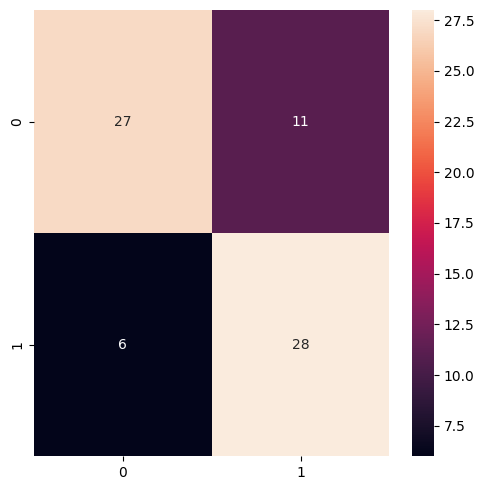

========== Random Forest ==========

Eficàcia (accuracy): 0.7917

Informe de classificació: 
               precision    recall  f1-score   support

      drives       0.87      0.71      0.78        38
       reves       0.73      0.88      0.80        34

    accuracy                           0.79        72
   macro avg       0.80      0.80      0.79        72
weighted avg       0.81      0.79      0.79        72


Matriu de confusió: 
 [[27 11]
 [ 4 30]]


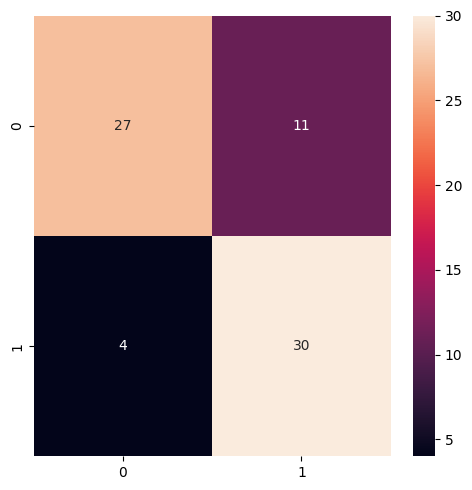

========== Logistic Regression ==========

Eficàcia (accuracy): 0.5000

Informe de classificació: 
               precision    recall  f1-score   support

      drives       0.54      0.34      0.42        38
       reves       0.48      0.68      0.56        34

    accuracy                           0.50        72
   macro avg       0.51      0.51      0.49        72
weighted avg       0.51      0.50      0.49        72


Matriu de confusió: 
 [[13 25]
 [11 23]]


/usr/local/lib64/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


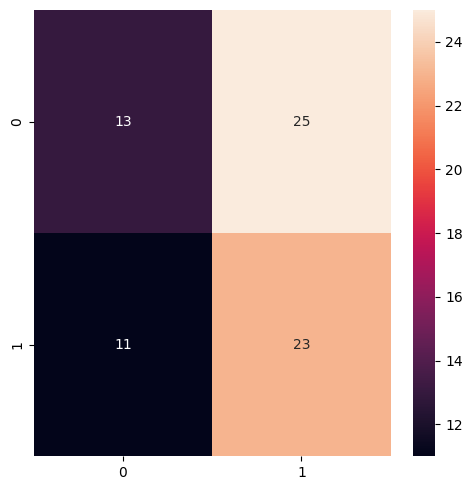

========== SVC ==========

Eficàcia (accuracy): 0.5833

Informe de classificació: 
               precision    recall  f1-score   support

      drives       0.75      0.32      0.44        38
       reves       0.54      0.88      0.67        34

    accuracy                           0.58        72
   macro avg       0.64      0.60      0.56        72
weighted avg       0.65      0.58      0.55        72


Matriu de confusió: 
 [[12 26]
 [ 4 30]]


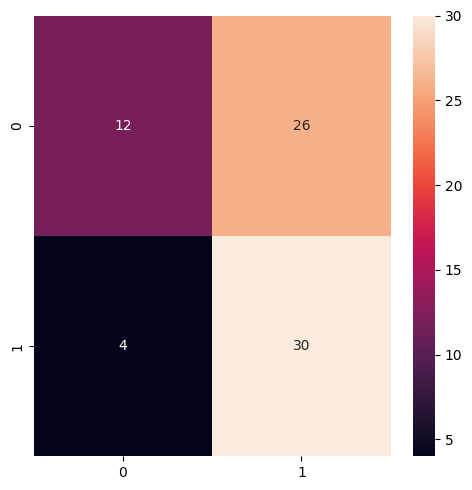

========== KNN Classifier ==========

Eficàcia (accuracy): 0.7639

Informe de classificació: 
               precision    recall  f1-score   support

      drives       0.84      0.68      0.75        38
       reves       0.71      0.85      0.77        34

    accuracy                           0.76        72
   macro avg       0.77      0.77      0.76        72
weighted avg       0.78      0.76      0.76        72


Matriu de confusió: 
 [[26 12]
 [ 5 29]]


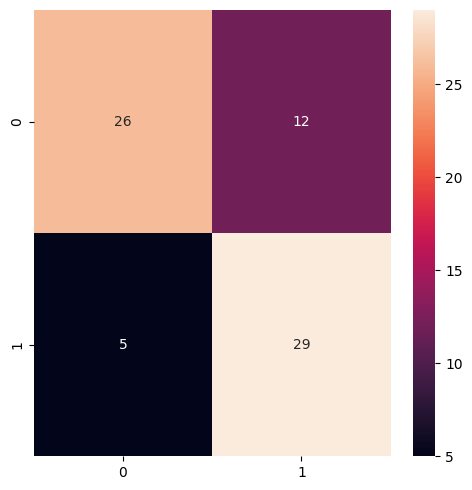

+-----------+-----------------+-----------------+-----------------------+----------+------------------+
| Metrics   |   Decision tree |   Random Forest |   Logistic Regression |      SVC |   KNN Classifier |
|-----------+-----------------+-----------------+-----------------------+----------+------------------|
| accuracy  |        0.763889 |        0.791667 |              0.5      | 0.583333 |         0.763889 |
| precision |        0.768065 |        0.801338 |              0.510417 | 0.642857 |         0.773013 |
| recall    |        0.767028 |        0.79644  |              0.509288 | 0.599071 |         0.768576 |
| f1-score  |        0.763843 |        0.791304 |              0.490165 | 0.555556 |         0.763478 |
+-----------+-----------------+-----------------+-----------------------+----------+------------------+


In [21]:
# Decision tree 
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
pred_dt = dt_model.predict(X_test)
result_90_dt = modelEvaluation(pred_dt, y_test, 'Decision tree')

# Random Forest 
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
pred_rf = rf_model.predict(X_test)
result_90_rf = modelEvaluation(pred_rf, y_test, 'Random Forest')

# Logistic Regression 
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
pred_lr = lr_model.predict(X_test)
results_90_lr = modelEvaluation(pred_lr, y_test, 'Logistic Regression')

# State Vector 
svc_model = SVC()
svc_model.fit(X_train, y_train)
pred_svc = svc_model.predict(X_test)
results_90_svc = modelEvaluation(pred_svc, y_test, 'SVC')

# KNN 
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
pred_knn = knn_model.predict(X_test)
results_90_knn = modelEvaluation(pred_knn, y_test, 'KNN Classifier')

# Mostrant resultats
dic = {
    'Metrics':['accuracy','precision','recall','f1-score'],
    'Decision tree' : result_90_dt,
    'Random Forest' : result_90_rf,
    'Logistic Regression' : results_90_lr,
    'SVC': results_90_svc,
    'KNN Classifier':results_90_knn   
}
metrics_df = pd.DataFrame(dic)

metrics_df = metrics_df.set_index('Metrics')

# Mostrant comparativa
print(tabulate(metrics_df, headers = 'keys', tablefmt = 'psql'))

## 90 mostres per cop i 10 per finestra (sense giroscopi)

In [22]:
X_train, X_test, y_train, y_test = generate_strokes_data(acc_drives_peaks, # Pics
                                                         acc_reves_peaks,  # Pics
                                                         gyro_drives_peaks, # Pics
                                                         gyro_reves_peaks,  # Pics
                                                         acc_drives_data, # Acc data
                                                         acc_reves_data, # Acc data
                                                         gyro_drives_data, # Gyro data
                                                         gyro_reves_data, # Gyro data
                                                         window_size=10, # Mida finestra
                                                         use_gyro_data=False, # Sense utilitzar giroscopi
                                                         test_size=0.2, # Test Size
                                                         samples_per_stroke=90 # Mostres per cop
                                                        ) 

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

Total data:  (180, 15)
X_train: (144, 15)
X_test: (36, 15)


========== Decision tree ==========

Eficàcia (accuracy): 0.6667

Informe de classificació: 
               precision    recall  f1-score   support

      drives       0.74      0.67      0.70        21
       reves       0.59      0.67      0.62        15

    accuracy                           0.67        36
   macro avg       0.66      0.67      0.66        36
weighted avg       0.67      0.67      0.67        36


Matriu de confusió: 
 [[14  7]
 [ 5 10]]


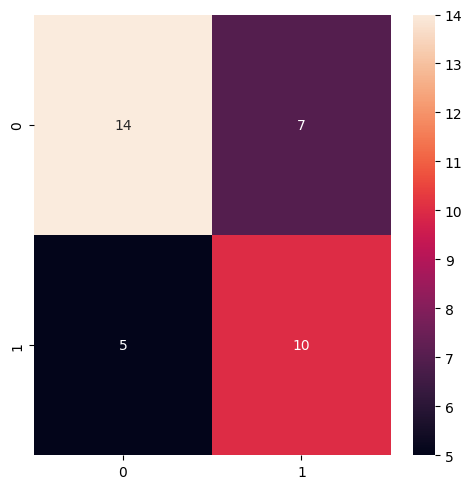

========== Random Forest ==========

Eficàcia (accuracy): 0.8056

Informe de classificació: 
               precision    recall  f1-score   support

      drives       0.85      0.81      0.83        21
       reves       0.75      0.80      0.77        15

    accuracy                           0.81        36
   macro avg       0.80      0.80      0.80        36
weighted avg       0.81      0.81      0.81        36


Matriu de confusió: 
 [[17  4]
 [ 3 12]]


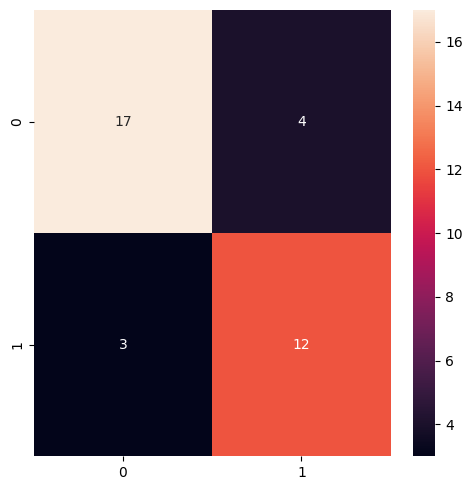

========== Logistic Regression ==========

Eficàcia (accuracy): 0.5833

Informe de classificació: 
               precision    recall  f1-score   support

      drives       0.71      0.48      0.57        21
       reves       0.50      0.73      0.59        15

    accuracy                           0.58        36
   macro avg       0.61      0.60      0.58        36
weighted avg       0.62      0.58      0.58        36


Matriu de confusió: 
 [[10 11]
 [ 4 11]]


/usr/local/lib64/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


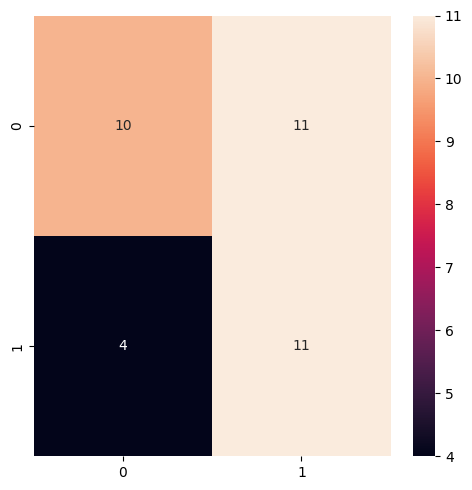

========== SVC ==========

Eficàcia (accuracy): 0.6944

Informe de classificació: 
               precision    recall  f1-score   support

      drives       1.00      0.48      0.65        21
       reves       0.58      1.00      0.73        15

    accuracy                           0.69        36
   macro avg       0.79      0.74      0.69        36
weighted avg       0.82      0.69      0.68        36


Matriu de confusió: 
 [[10 11]
 [ 0 15]]


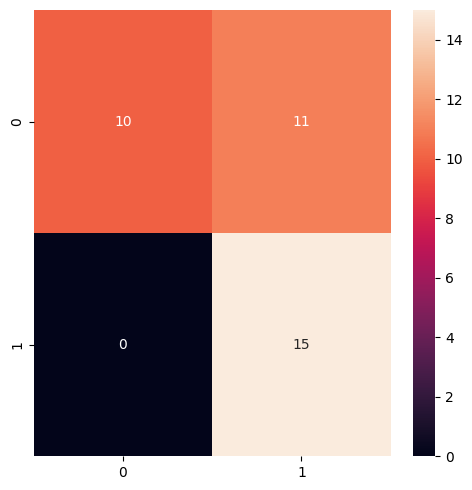

========== KNN Classifier ==========

Eficàcia (accuracy): 0.8611

Informe de classificació: 
               precision    recall  f1-score   support

      drives       0.90      0.86      0.88        21
       reves       0.81      0.87      0.84        15

    accuracy                           0.86        36
   macro avg       0.86      0.86      0.86        36
weighted avg       0.86      0.86      0.86        36


Matriu de confusió: 
 [[18  3]
 [ 2 13]]


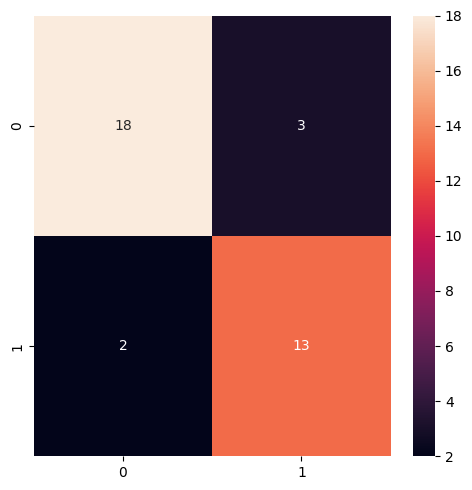

+-----------+-----------------+-----------------+-----------------------+----------+------------------+
| Metrics   |   Decision tree |   Random Forest |   Logistic Regression |      SVC |   KNN Classifier |
|-----------+-----------------+-----------------+-----------------------+----------+------------------|
| accuracy  |        0.666667 |        0.805556 |              0.583333 | 0.694444 |         0.861111 |
| precision |        0.662539 |        0.8      |              0.607143 | 0.788462 |         0.85625  |
| recall    |        0.666667 |        0.804762 |              0.604762 | 0.738095 |         0.861905 |
| f1-score  |        0.6625   |        0.801731 |              0.583012 | 0.688434 |         0.858379 |
+-----------+-----------------+-----------------+-----------------------+----------+------------------+


In [23]:
# Decision tree 
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
pred_dt = dt_model.predict(X_test)
result_90_dt = modelEvaluation(pred_dt, y_test, 'Decision tree')

# Random Forest 
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
pred_rf = rf_model.predict(X_test)
result_90_rf = modelEvaluation(pred_rf, y_test, 'Random Forest')

# Logistic Regression 
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
pred_lr = lr_model.predict(X_test)
results_90_lr = modelEvaluation(pred_lr, y_test, 'Logistic Regression')

# State Vector 
svc_model = SVC()
svc_model.fit(X_train, y_train)
pred_svc = svc_model.predict(X_test)
results_90_svc = modelEvaluation(pred_svc, y_test, 'SVC')

# KNN 
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
pred_knn = knn_model.predict(X_test)
results_90_knn = modelEvaluation(pred_knn, y_test, 'KNN Classifier')

# Mostrant resultats
dic = {
    'Metrics':['accuracy','precision','recall','f1-score'],
    'Decision tree' : result_90_dt,
    'Random Forest' : result_90_rf,
    'Logistic Regression' : results_90_lr,
    'SVC': results_90_svc,
    'KNN Classifier':results_90_knn   
}
metrics_df = pd.DataFrame(dic)

metrics_df = metrics_df.set_index('Metrics')

# Mostrant comparativa
print(tabulate(metrics_df, headers = 'keys', tablefmt = 'psql'))